# HeartDisease

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [2]:
font_path = 'C:\\Windows\\Fonts\\HANYGO230.ttf' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
plt.rc('font', family=font_name)
# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용
plt.rc('axes', unicode_minus=False)

## 1. 데이터 가져오기

In [3]:
df = pd.read_csv('data/heart_2022_with_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## 2. 데이터 구조 및 변수 이해

In [4]:
pd.set_option('display.max_columns', None)   # 컬럼 생략 없이 전체 표시
pd.set_option('display.max_rows', None)      # 필요한 경우 행도 생략 없이 표시
pd.set_option('display.width', None)   
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

## 03. 데이터 요약 및 기술 통계

In [5]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [6]:
pd.set_option('display.max_columns', None)   # 컬럼 생략 없이 전부 출력
pd.set_option('display.max_rows', None)      # 행 생략 없이 출력 (필요하면)
pd.set_option('display.width', None)         # 가로줄 자동 줄바꿈 방지
pd.set_option('display.max_colwidth', None)
df.describe(include='object')

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,445132,445132,443934,436824,444039,433772,442067,440727,443575,443359,441989,442913,442320,443206,442499,444045,424485,423568,420892,421120,421217,419476,409670,409472,389086,431075,436053,398558,379005,398011,368092,362616,394509,394368
unique,54,2,5,4,2,4,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,4,4,2,5,13,2,2,2,2,4,2,3
top,Washington,Female,Very good,Within past year (anytime less than 12 months ago),Yes,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,Yes,No,"No, did not receive any tetanus shot in the past 10 years",No,No
freq,26152,235893,148444,350944,337559,233455,416959,414176,424336,376665,406504,407257,350910,422891,291351,368722,385539,399910,370792,353039,404404,387029,245955,311988,223221,320421,47099,210891,249919,209256,215604,121493,377324,270055


In [7]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

## 3. 데이터 결측치 이상치

In [8]:
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

<Axes: >

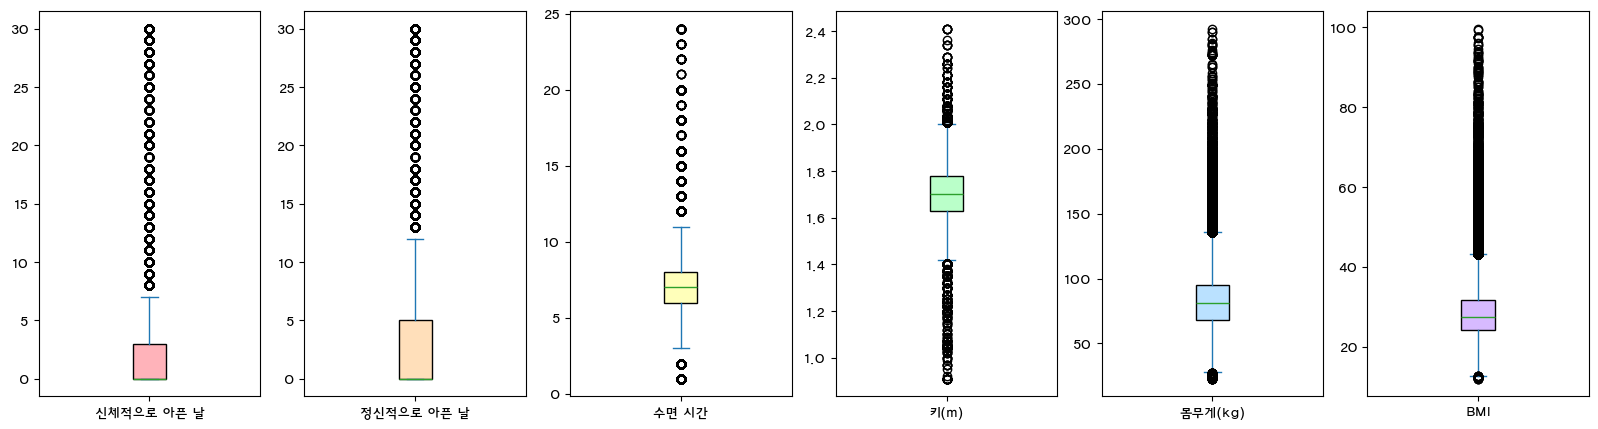

In [9]:
fig, ax = plt.subplots(1, 6, figsize=(20,5))
df['PhysicalHealthDays'].rename('신체적으로 아픈 날').plot(kind='box', ax=ax[0],  patch_artist=True, boxprops=dict(facecolor='#FFB3BA'))
df['MentalHealthDays'].rename('정신적으로 아픈 날').plot(kind='box', ax=ax[1],  patch_artist=True, boxprops=dict(facecolor='#FFDFBA'))
df['SleepHours'].rename('수면 시간').plot(kind='box', ax=ax[2],  patch_artist=True, boxprops=dict(facecolor='#FFFFBA'))
df['HeightInMeters'].rename('키(m)').plot(kind='box', ax=ax[3],  patch_artist=True, boxprops=dict(facecolor='#BAFFC9'))
df['WeightInKilograms'].rename('몸무게(kg)').plot(kind='box', ax=ax[4],  patch_artist=True, boxprops=dict(facecolor='#BAE1FF'))
df['BMI'].plot(kind='box', ax=ax[5],  patch_artist=True, boxprops=dict(facecolor='#D7BAFF'))

## 4. 데이터 전처리

### 결측치 제거

In [10]:
# 결측치 행 전부 삭제
df = df.dropna().reset_index()


### 이상치

In [11]:
# 수면시간 이상치
q1 = df['SleepHours'].quantile(0.25)
q3 = df['SleepHours'].quantile(0.75)

iqr = q3 - q1

low = q1 - iqr * 1.5
high = q3 + iqr * 1.5
high

# 하한 이상치는 최소값 / 상한 이상치는 최대값으로 변경
df['SleepHours'] = df['SleepHours'].clip(lower=low, upper=high)

## 5. Feature Engineering

In [12]:
# 심근경색 / 협심증 여부를 심장 질환 컬럼하나로 통합
df['HeartDisease'] = (df['HadHeartAttack'] == 'Yes') | (df['HadAngina'] == 'Yes')
df['HeartDisease'] = df['HeartDisease'].map({True: 'Yes', False: 'No'})
df['HeartDisease_num'] = df['HeartDisease'].map({'Yes':1, 'No':0})


# 흡연 여부
df['SmokerStatus'] = df['SmokerStatus'].replace({
    'Never smoked': '비흡연',
    'Former smoker': '과거흡연',
    'Current smoker - now smokes some days': '가끔흡연',
    'Current smoker - now smokes every day': '매일흡연'
})

# 전자 담배
df.loc[:,'ECigaretteUsage'] = df['ECigaretteUsage'].replace({
    'Never used e-cigarettes in my entire life': '비흡연',
    'Not at all (right now)': '과거흡연',
    'Use them some days': '가끔흡연',
    'Use them every day': '매일흡연'
})


df['bmi_group'] = pd.cut(df['BMI'], bins = [0, 18.5, 25, 30, 35, df['BMI'].max()], labels = ['저체중', '정상체중', '과체중', '비만', '고도비만'])

## 6. 변수 분포 시각화

### 심혈관

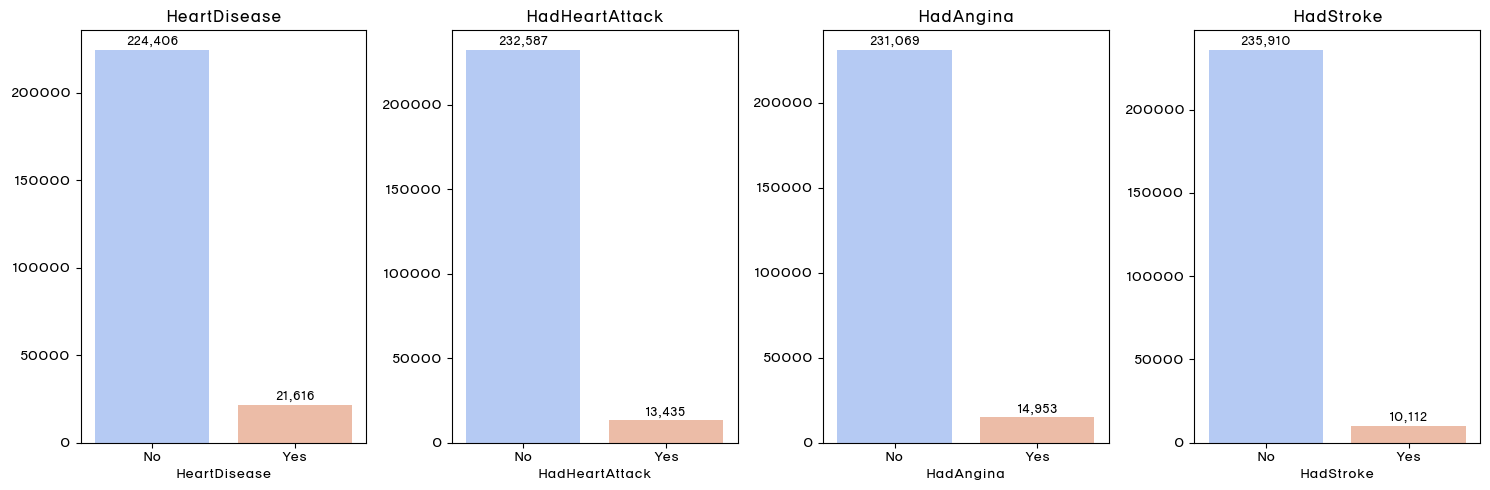

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

sns.countplot(data=df, x='HeartDisease', palette='coolwarm', hue='HeartDisease', ax = ax[0])
sns.countplot(data=df, x='HadHeartAttack', palette='coolwarm', hue='HadHeartAttack', ax = ax[1])
sns.countplot(data=df, x='HadAngina', palette='coolwarm', hue='HadAngina', ax = ax[2])
sns.countplot(data=df, x='HadStroke', palette='coolwarm', hue='HadStroke', ax = ax[3])

titles = ['HeartDisease', 'HadHeartAttack', 'HadAngina', 'HadStroke']

for idx, col in enumerate(titles):
    counts = df[col].value_counts()

    for i, (label, count) in enumerate(counts.items()):
        ax[idx].text(
            i, count + 1500,        
            f'{count:,}',           
            ha='center', va='bottom',
            fontsize=9, color='black'
        )

    ax[idx].set_title(col)
    ax[idx].set_ylabel('')

plt.tight_layout()
plt.show()

### 생활습관 / 신체요인

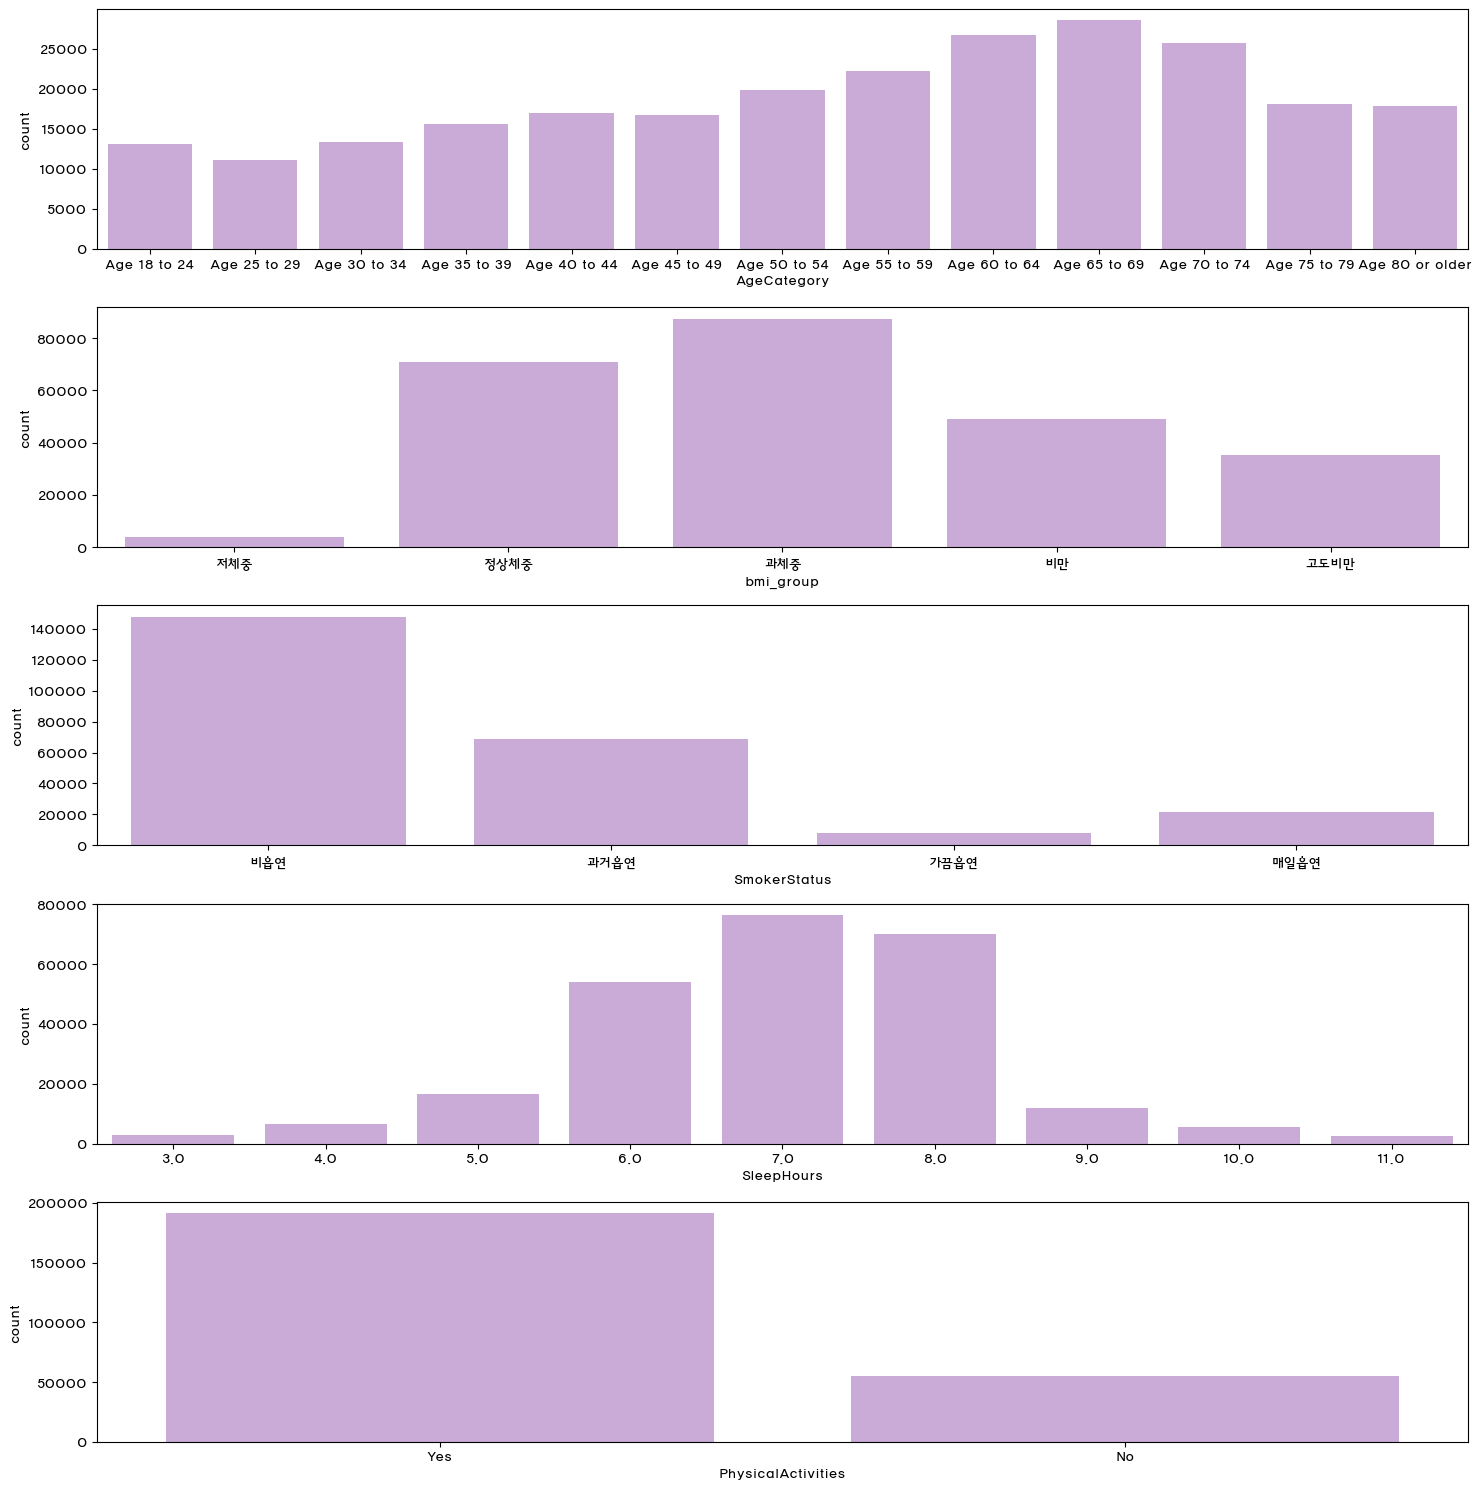

In [14]:
order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']

s_order = ['비흡연', '과거흡연', '가끔흡연', '매일흡연']
fig, ax = plt.subplots(5, 1, figsize = (15, 15))

sns.countplot(data= df , x = 'AgeCategory', order=order, ax = ax[0], color='#CDA4DE')
sns.countplot(data= df , x = 'bmi_group', ax = ax[1], color='#CDA4DE')
sns.countplot(data= df , x = 'SmokerStatus', order=s_order,  ax = ax[2], color='#CDA4DE')
sns.countplot(data= df , x = 'SleepHours', ax = ax[3], color='#CDA4DE')
sns.countplot(data= df , x = 'PhysicalActivities', ax = ax[4], color='#CDA4DE')





plt.tight_layout()
plt.show()

## 7. 변수간 관계 시각화

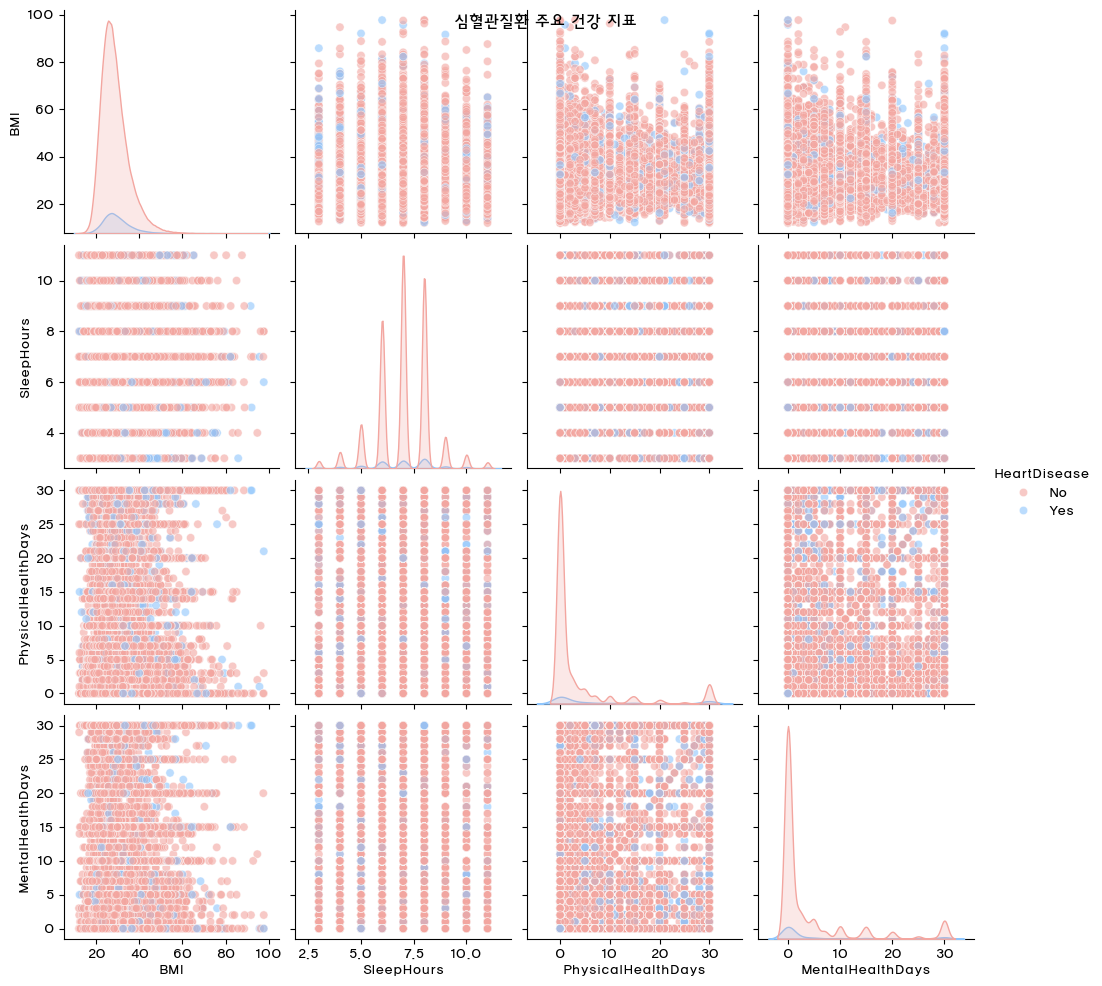

In [38]:
cols = ['BMI', 'SleepHours', 'PhysicalHealthDays', 'MentalHealthDays', 'HeartDisease']

sns.pairplot(df[cols], hue='HeartDisease', 
    palette={'Yes': '#8EC5FC', 'No': '#F3A6A0'}, diag_kind='kde', plot_kws={'alpha':0.6})

plt.suptitle('심혈관질환 주요 건강 지표')
plt.show()

###  7-1 성별별 심혈관질환 비율

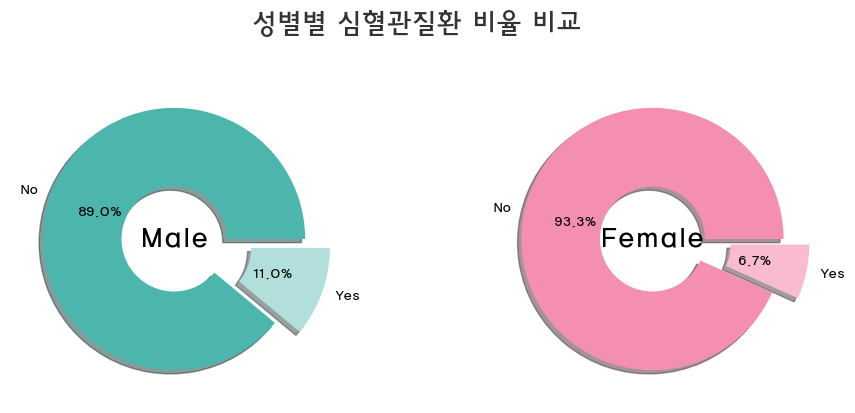

In [15]:
male_df = df[df['Sex'] == 'Male']
male_df
female_df = df[df['Sex'] == 'Female']

male_heart = male_df['HeartDisease'].value_counts()
male_heart

female_heart = female_df['HeartDisease'].value_counts()
female_heart
colors_male = ['#4DB6AC', '#B2DFDB']      # 남자: 청록색 계열
colors_female = ['#F48FB1', '#F8BBD0']    # 여자: 분홍색 계열

fig, ax = plt.subplots(1, 2, figsize=(10, 4))#B2DFDB
explode = [0, 0.2]
# 남성
ax[0].pie(male_heart, labels=male_heart.index, autopct = '%1.1f%%',
            wedgeprops={'width' : 0.6}, colors = colors_male, shadow=True,
            explode = explode
        )
ax[0].text(0, 0, 'Male', ha='center', va = 'center', fontsize = 20)

# 여성
ax[1].pie(female_heart, labels=female_heart.index, autopct = '%1.1f%%',
            wedgeprops={'width' : 0.6}, colors = colors_female, shadow=True,
            explode = explode
        )
ax[1].text(0, 0, 'Female', ha='center', va = 'center', fontsize = 20)

plt.suptitle(
    '성별별 심혈관질환 비율 비교',
    fontsize=20,
    fontweight='bold',
    color='#333333',
    y=1.02   
)

plt.tight_layout()
plt.show()

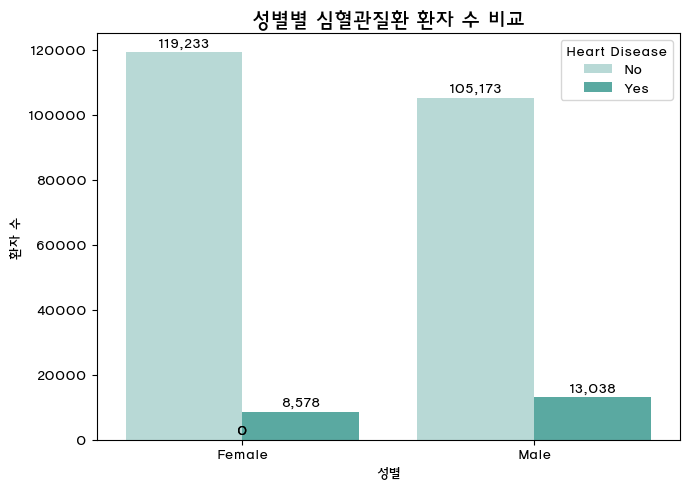

In [39]:
sex_heart = df.groupby(['Sex', 'HeartDisease']).size().reset_index(name='count')

plt.figure(figsize=(7,5))
bar = sns.barplot(data=sex_heart, x='Sex', y='count', hue='HeartDisease',
                  palette=['#B2DFDB', '#4DB6AC'])  # 같은 계열 색상

# 막대 위에 숫자 표시
for p in bar.patches:
    bar.annotate(
        format(int(p.get_height()), ','),
        (p.get_x() + p.get_width() / 2.,
         p.get_height() + max(sex_heart['count']) * 0.01),
        ha='center', va='bottom', fontsize=10
    )

plt.title('성별별 심혈관질환 환자 수 비교', fontsize=15)
plt.ylabel('환자 수')
plt.xlabel('성별')
plt.legend(title='Heart Disease')
plt.tight_layout()
plt.show()

### 7-2 연령대별 심혈관지로한 비율

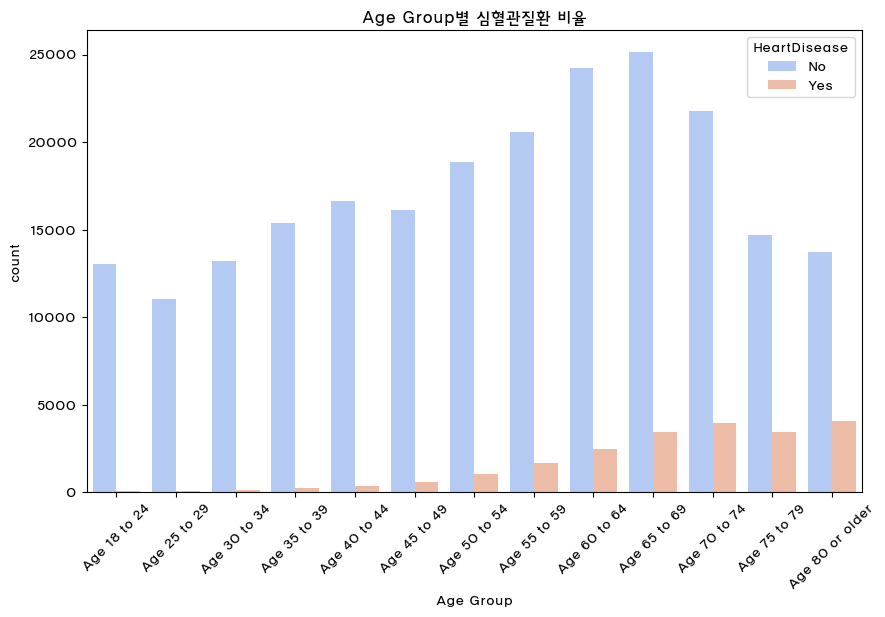

In [16]:
order = ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older']

plt.figure(figsize=(10,6))
sns.countplot(data=df, x = 'AgeCategory', hue='HeartDisease', order=order, palette='coolwarm')

plt.xticks(rotation = 45)
plt.xlabel('Age Group')
plt.title('Age Group별 심혈관질환 비율')
plt.show()

### 7-3 생활 습관에 따른 심혈관질환 비율

C:\Users\TJ\AppData\Local\Temp\ipykernel_6248\802311254.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'SmokerStatus', y='HeartDisease_num', palette='coolwarm',  ax = ax[0])
C:\Users\TJ\AppData\Local\Temp\ipykernel_6248\802311254.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'PhysicalActivities' , data = df, y='HeartDisease_num',palette='coolwarm', ax = ax[1])
C:\Users\TJ\AppData\Local\Temp\ipykernel_6248\802311254.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'AlcoholDrinkers' , data = df, y='HeartD

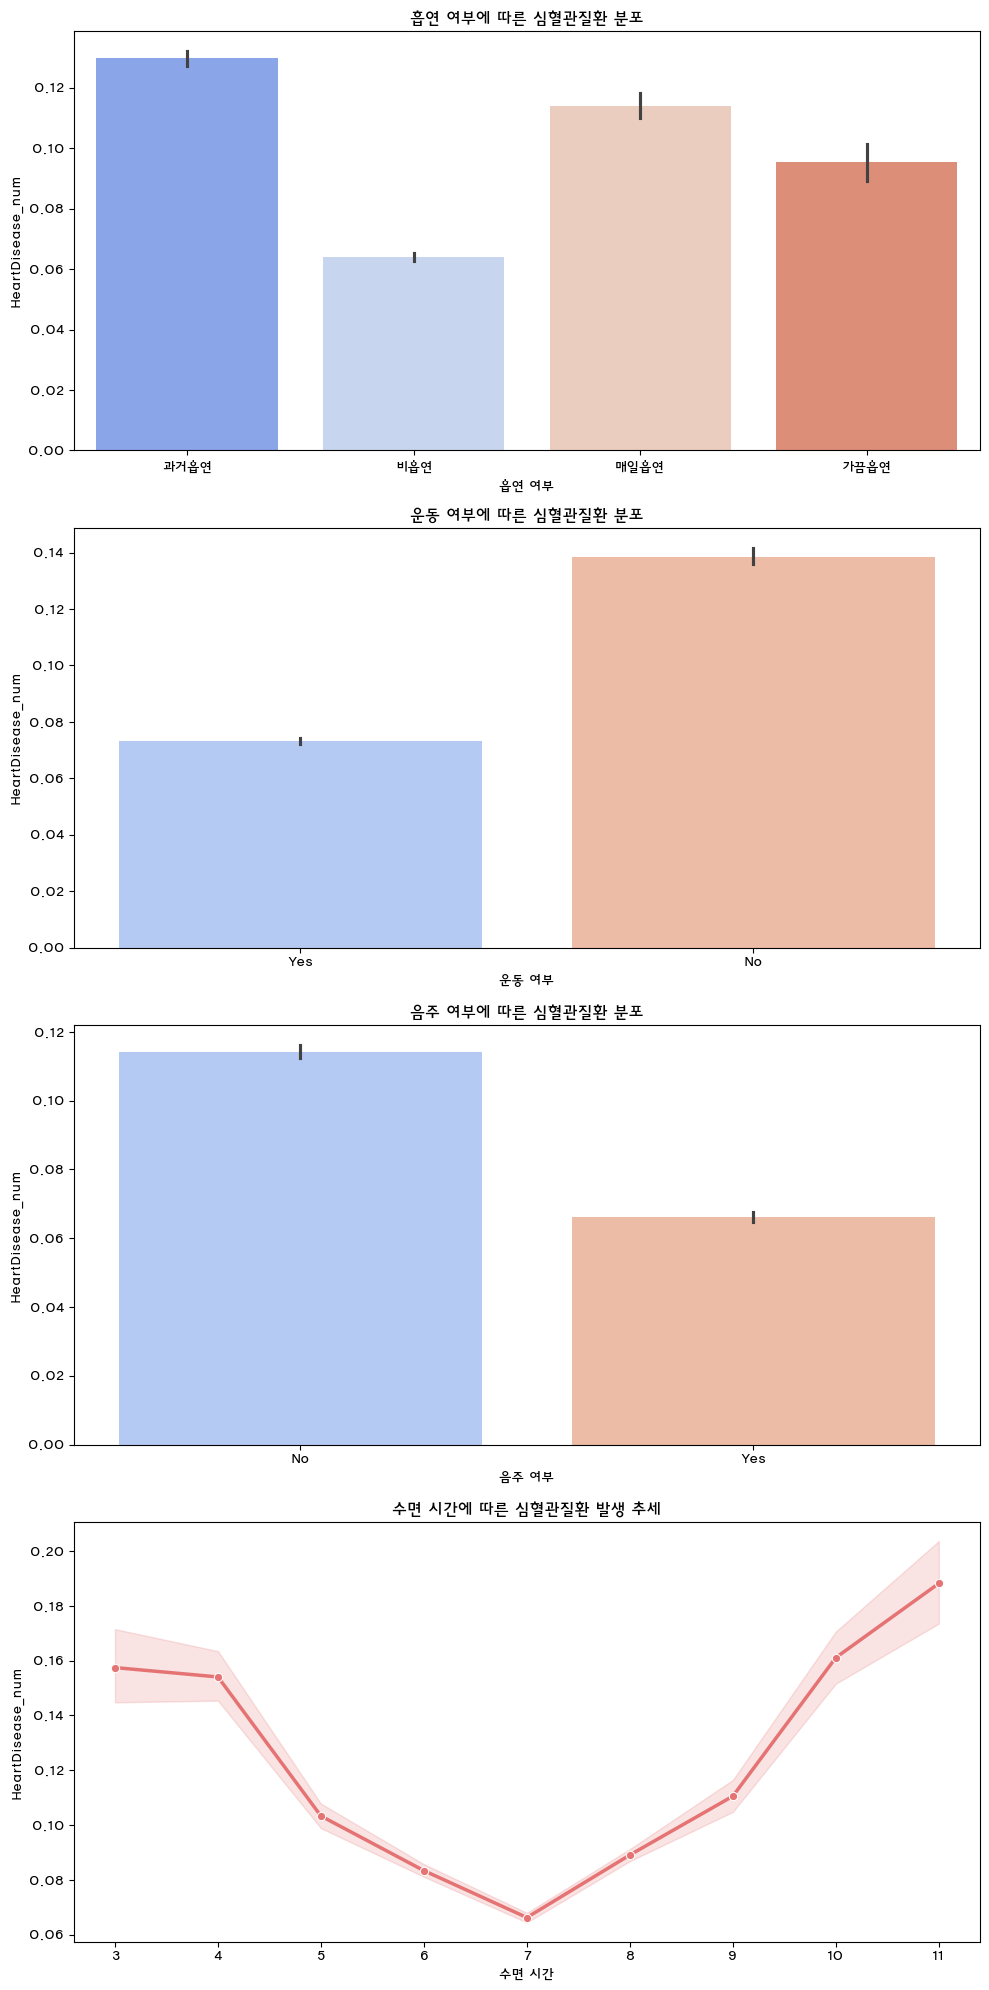

In [17]:
fig, ax = plt.subplots(4, 1, figsize=(10,20))

# 흡연여부
sns.barplot(data = df, x = 'SmokerStatus', y='HeartDisease_num', palette='coolwarm',  ax = ax[0])
ax[0].set_xlabel('흡연 여부')
ax[0].set_title('흡연 여부에 따른 심혈관질환 분포')


# 운동 여부
ax[1].set_xlabel('운동 여부')
sns.barplot(x = 'PhysicalActivities' , data = df, y='HeartDisease_num',palette='coolwarm', ax = ax[1])
ax[1].set_title('운동 여부에 따른 심혈관질환 분포')

# 음주
ax[2].set_xlabel('음주 여부')
sns.barplot(x = 'AlcoholDrinkers' , data = df, y='HeartDisease_num',palette='coolwarm', ax = ax[2])
ax[2].set_title('음주 여부에 따른 심혈관질환 분포')

# 수면 시간
sns.lineplot(data=df, x='SleepHours', y='HeartDisease_num', color='#E57373', marker='o', linewidth=2.5, ax=ax[3])
ax[3].set_xlabel('수면 시간')
ax[3].set_title('수면 시간에 따른 심혈관질환 발생 추세')


plt.tight_layout()
plt.show()

### 7-4 BMI

C:\Users\TJ\AppData\Local\Temp\ipykernel_6248\1821177874.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='bmi_group', y='HeartDisease_num',


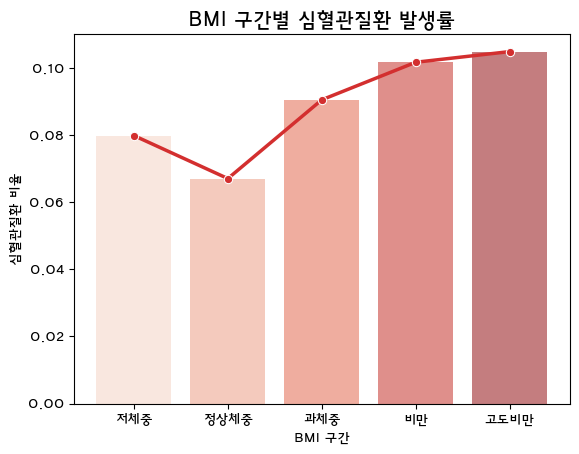

In [18]:
sns.barplot(data=df, x='bmi_group', y='HeartDisease_num',
             palette='Reds', alpha=0.6, errorbar=None)
sns.lineplot(data=df, x='bmi_group', y='HeartDisease_num',
              color='#D32F2F', marker='o', linewidth=2.5, errorbar=None)

plt.title('BMI 구간별 심혈관질환 발생률', fontsize=15, fontweight='bold')
plt.xlabel('BMI 구간')
plt.ylabel('심혈관질환 비율')
plt.show()

### 7-5 왜 why 남자 인원수가 더 적은데 심혈관질환에 걸린 사람은 더 많은가 ?

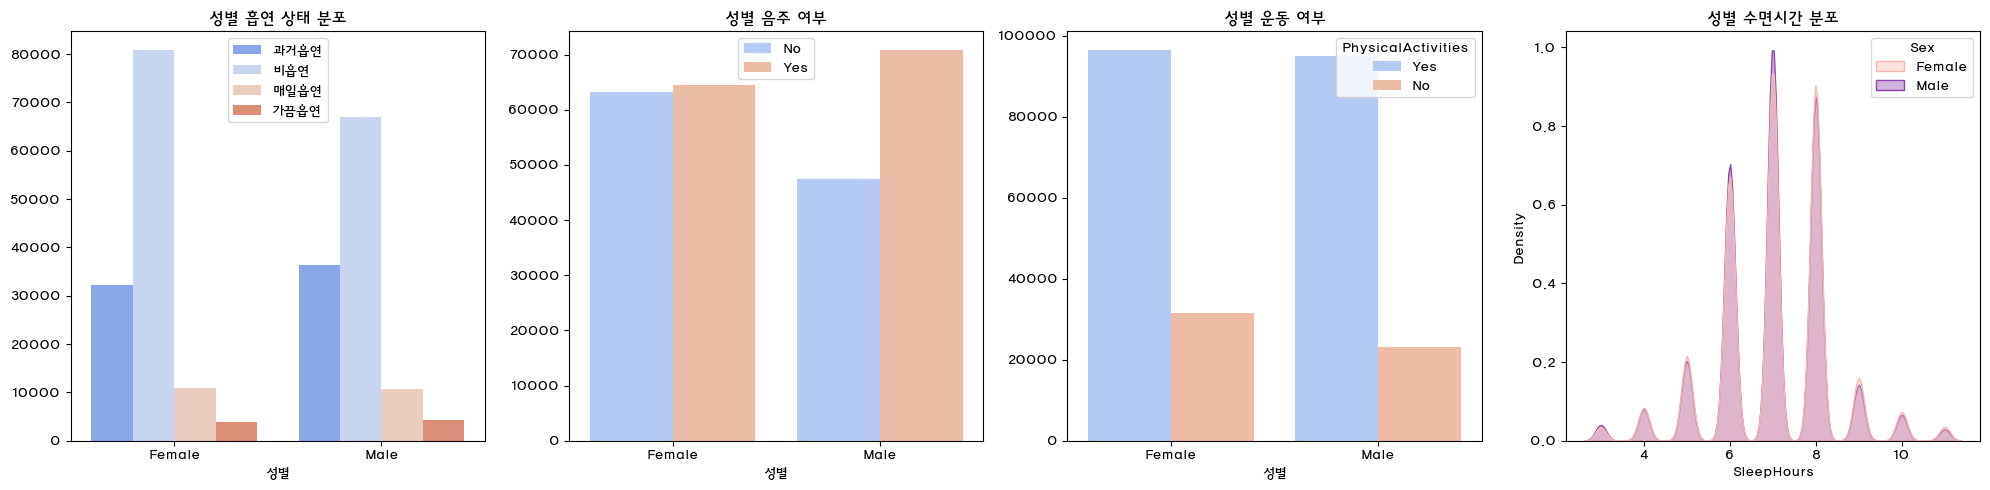

In [ ]:
fig, ax = plt.subplots(1,4, figsize = (20, 5))


sns.countplot(data=df, x = 'Sex', hue = 'SmokerStatus', palette='coolwarm', ax = ax[0])
ax[0].set_title('성별 흡연 상태 분포')
ax[0].set_xlabel('성별')
ax[0].set_ylabel('')

sns.countplot(data=df, x = 'Sex', hue = 'AlcoholDrinkers', palette='coolwarm', ax = ax[1])
ax[1].set_title('성별 음주 여부')
ax[1].set_xlabel('성별')
ax[1].set_ylabel('')

sns.countplot(data=df, x = 'Sex', hue = 'PhysicalActivities', palette='coolwarm', ax = ax[2])
ax[2].set_title('성별 운동 여부')
ax[2].set_xlabel('성별')
ax[2].set_ylabel('')

sns.kdeplot(
    data=df, x='SleepHours', hue='Sex',
    common_norm=False,    
    fill=True,           
    alpha=0.4,            
    palette={'Male': '#8E44AD', 'Female': '#F5B7B1'},  
    ax = ax[3]
)


ax[3].set_title('성별 수면시간 분포')
# ax[4].set_xlabel('성별')
# ax[4].set_ylabel('수면 시간')


ax[1].legend(loc = 'upper center')
ax[0].legend(loc = 'upper center')

plt.tight_layout()
plt.show()

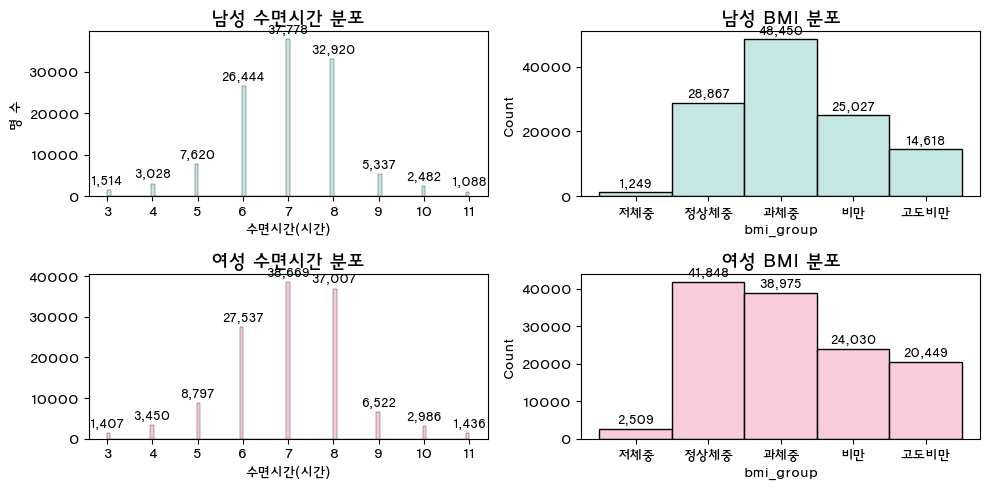

In [20]:
fig, ax = plt.subplots(2, 2 , figsize= (10,5))

sns.histplot(data = male_df, x = 'SleepHours', ax = ax[0][0], color='#B2DFDB')
sns.histplot(data= male_df, x = 'bmi_group', ax = ax[0][1], color='#B2DFDB')
ax[0][0].set_title('남성 수면시간 분포', fontsize=14)
ax[0][0].set_xlabel('수면시간(시간)')
ax[0][0].set_ylabel('명 수')
ax[0][1].set_title('남성 BMI 분포', fontsize=14)

male_sleep = male_df['SleepHours'].value_counts().sort_index()
for hour, count in male_sleep.items():
    ax[0][0].text(hour, count + 1000, f'{count:,}', ha='center', va='bottom', fontsize=9, color='black')
    
male_bmi = male_df['bmi_group'].value_counts().reindex(['저체중','정상체중','과체중','비만','고도비만'])
for i, (label, count) in enumerate(male_bmi.items()):
    ax[0][1].text(i, count + 1000, f'{count:,}', ha='center', va='bottom', fontsize=9, color='black')

sns.histplot(data = female_df, x= 'SleepHours', ax = ax[1][0], color='#F8BBD0')
sns.histplot(data= female_df, x = 'bmi_group', ax = ax[1][1], color='#F8BBD0')
ax[1][0].set_title('여성 수면시간 분포', fontsize=14)
ax[1][0].set_xlabel('수면시간(시간)')
ax[1][0].set_ylabel('')

ax[1][1].set_title('여성 BMI 분포', fontsize=14)

female_sleep = female_df['SleepHours'].value_counts().sort_index()
for hour, count in female_sleep.items():
    ax[1][0].text(hour, count + 1000, f'{count:,}', ha='center', va='bottom', fontsize=9, color='black')

female_bmi = female_df['bmi_group'].value_counts().reindex(['저체중','정상체중','과체중','비만','고도비만'])
for i, (label, count) in enumerate(female_bmi.items()):
    ax[1][1].text(i, count + 1000, f'{count:,}', ha='center', va='bottom', fontsize=9, color='black')

# for i, time in enumerate(male_df['SleepHours'].value_counts().sort_index()) :
#     ax[0].text(i, time, time, ha = 'center')
# for i, time in enumerate(female_df['SleepHours'].value_counts().sort_index()) :
#     ax[1].text(i, time, time, ha = 'center')

plt.tight_layout()
plt.show()

- 남성이 여성보다 흡연율이 압도적으로 높다
- 남성의 BMI 분포가 더 위험요인 쪽으로 치우쳐 있음

Text(0.5, 1.02, '심혈관질환 유무에 따른 뇌졸중 환자 비율 비교')

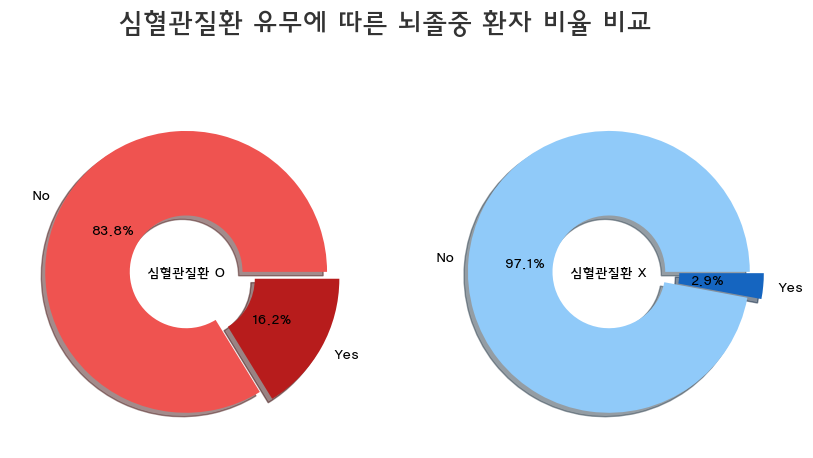

In [30]:
heart_df = df[df['HeartDisease'] == 'Yes']
no_heart_df = df[df['HeartDisease'] == 'No']


heart_count = heart_df['HadStroke'].value_counts()
no_heart_count = no_heart_df['HadStroke'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

explode = [0, 0.1]
ax[0].pie(heart_count, labels= heart_count.index, 
        autopct = '%1.1f%%',
        wedgeprops={'width' : 0.6}, colors = ['#EF5350','#B71C1C'], shadow=True,
        explode = explode
        
        )

ax[1].pie(no_heart_count, labels = no_heart_count.index, 
          autopct = '%1.1f%%',
          wedgeprops = {'width' : 0.6}, colors = ['#90CAF9', '#1565C0'], shadow = True, 
          explode = explode)


ax[0].text(0, 0, '심혈관질환 O', ha='center', va = 'center', fontsize = 10)
ax[1].text(0, 0, '심혈관질환 X', ha='center', va = 'center', fontsize = 10)
plt.suptitle(
    '심혈관질환 유무에 따른 뇌졸중 환자 비율 비교',
    fontsize=20,
    fontweight='bold',
    color='#333333',
    y=1.02   
)


심장병은 뇌졸중에 이어 우리나라에서 두 번째로 중요한 사망원인입니다. 그런데 뇌졸중과 심장병은 서로 밀접한 관계가 있습니다.

심장질환이 있으면 심장에 혈전이 생기기 쉬우며 이 혈전이 떨어져 나와서 혈관 속을 흘러 다니다가 뇌혈관을 막으면 뇌경색(이를 심인성 뇌경색 또는 색전증이라고 한다)이 생기게 됩니다. 

- 출처 서울 아산병원 뇌졸중 센터

### 7-6 비만 / 흡연은 만병의 근원인가 ? ? 한 번 알아보자

C:\Users\TJ\AppData\Local\Temp\ipykernel_6248\2673787038.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  angina_rate = df.groupby('bmi_group')['HadAngina'].apply(lambda x: (x == 'Yes').mean())
C:\Users\TJ\AppData\Local\Temp\ipykernel_6248\2673787038.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heart_attack_rate = df.groupby('bmi_group')['HadHeartAttack'].apply(lambda x: (x == 'Yes').mean())
C:\Users\TJ\AppData\Local\Temp\ipykernel_6248\2673787038.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain 

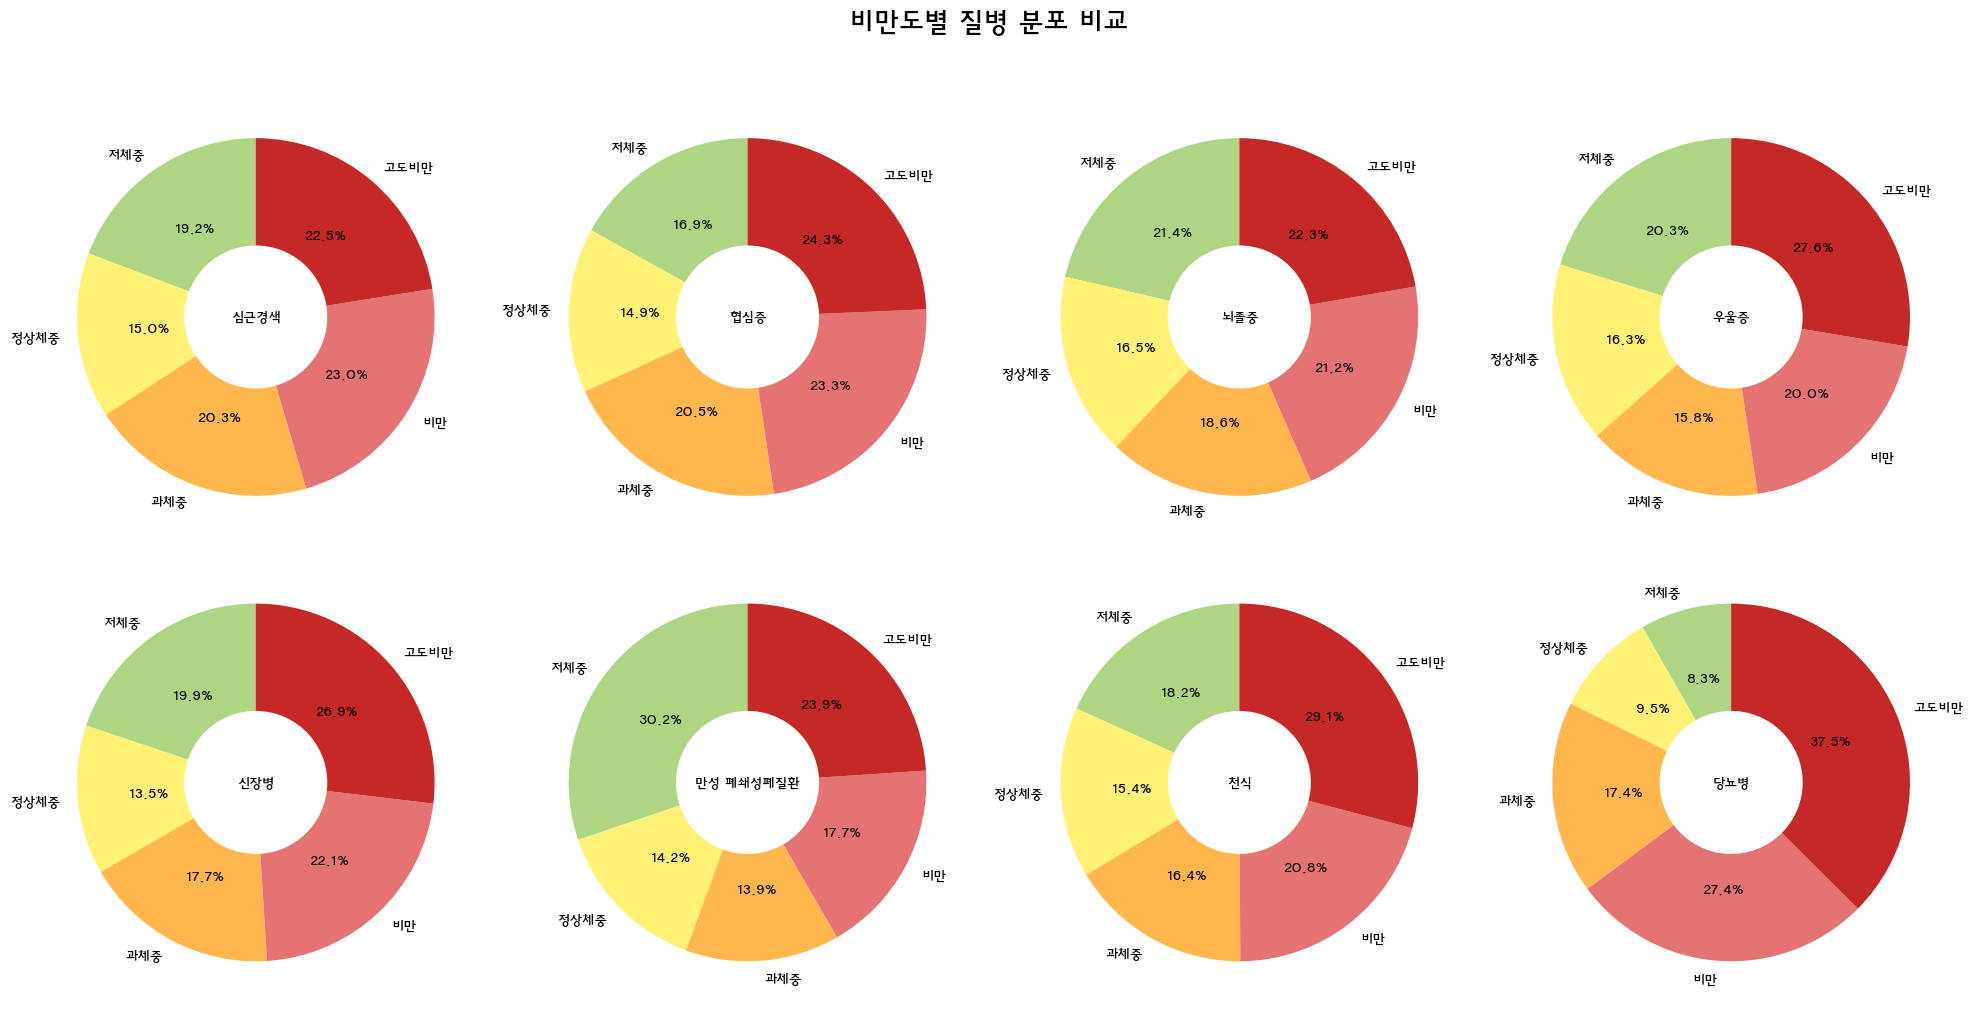

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))



angina_rate = df.groupby('bmi_group')['HadAngina'].apply(lambda x: (x == 'Yes').mean())
heart_attack_rate = df.groupby('bmi_group')['HadHeartAttack'].apply(lambda x: (x == 'Yes').mean())
stroke_rate = df.groupby('bmi_group')['HadStroke'].apply(lambda x: (x == 'Yes').mean())
depressive_disorder_rate = df.groupby('bmi_group')['HadDepressiveDisorder'].apply(lambda x: (x == 'Yes').mean())
kidney_rate = df.groupby('bmi_group')['HadKidneyDisease'].apply(lambda x: (x == 'Yes').mean())
copd_rate = df.groupby('bmi_group')['HadCOPD'].apply(lambda x: (x == 'Yes').mean())
asthma_rate = df.groupby('bmi_group')['HadAsthma'].apply(lambda x: (x == 'Yes').mean())
diabetes_rate = df.groupby('bmi_group')['HadDiabetes'].apply(
    lambda x: ((x == 'Yes') | (x == 'No, pre-diabetes or borderline diabetes')).mean()
)
    
# 심근경색
ax[0][0].pie(
    heart_attack_rate,
    labels=heart_attack_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)

ax[0][0].text(0, 0, '심근경색', ha='center', va='center')

# 협심증
ax[0][1].pie(
    angina_rate,
    labels=angina_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[0][1].text(0, 0, '협심증', ha='center', va='center')

# 뇌졸중
ax[0][2].pie(
    stroke_rate,
    labels=stroke_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[0][2].text(0, 0, '뇌졸중', ha='center', va='center')

# 우울증
ax[0][3].pie(
    depressive_disorder_rate,
    labels=depressive_disorder_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[0][3].text(0, 0, '우울증', ha='center', va='center')

# 신장병
ax[1][0].pie(
    kidney_rate,
    labels=kidney_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[1][0].text(0, 0, '신장병', ha='center', va='center')

# 만성 폐쇄폐질환
ax[1][1].pie(
    copd_rate,
    labels=copd_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[1][1].text(0, 0, '만성 폐쇄성폐질환', ha='center', va='center')

# 천식
ax[1][2].pie(
    asthma_rate,
    labels=asthma_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[1][2].text(0, 0, '천식', ha='center', va='center')

# 당뇨
ax[1][3].pie(
    diabetes_rate,
    labels=diabetes_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[1][3].text(0, 0, '당뇨병', ha='center', va='center')


plt.suptitle('비만도별 질병 분포 비교', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

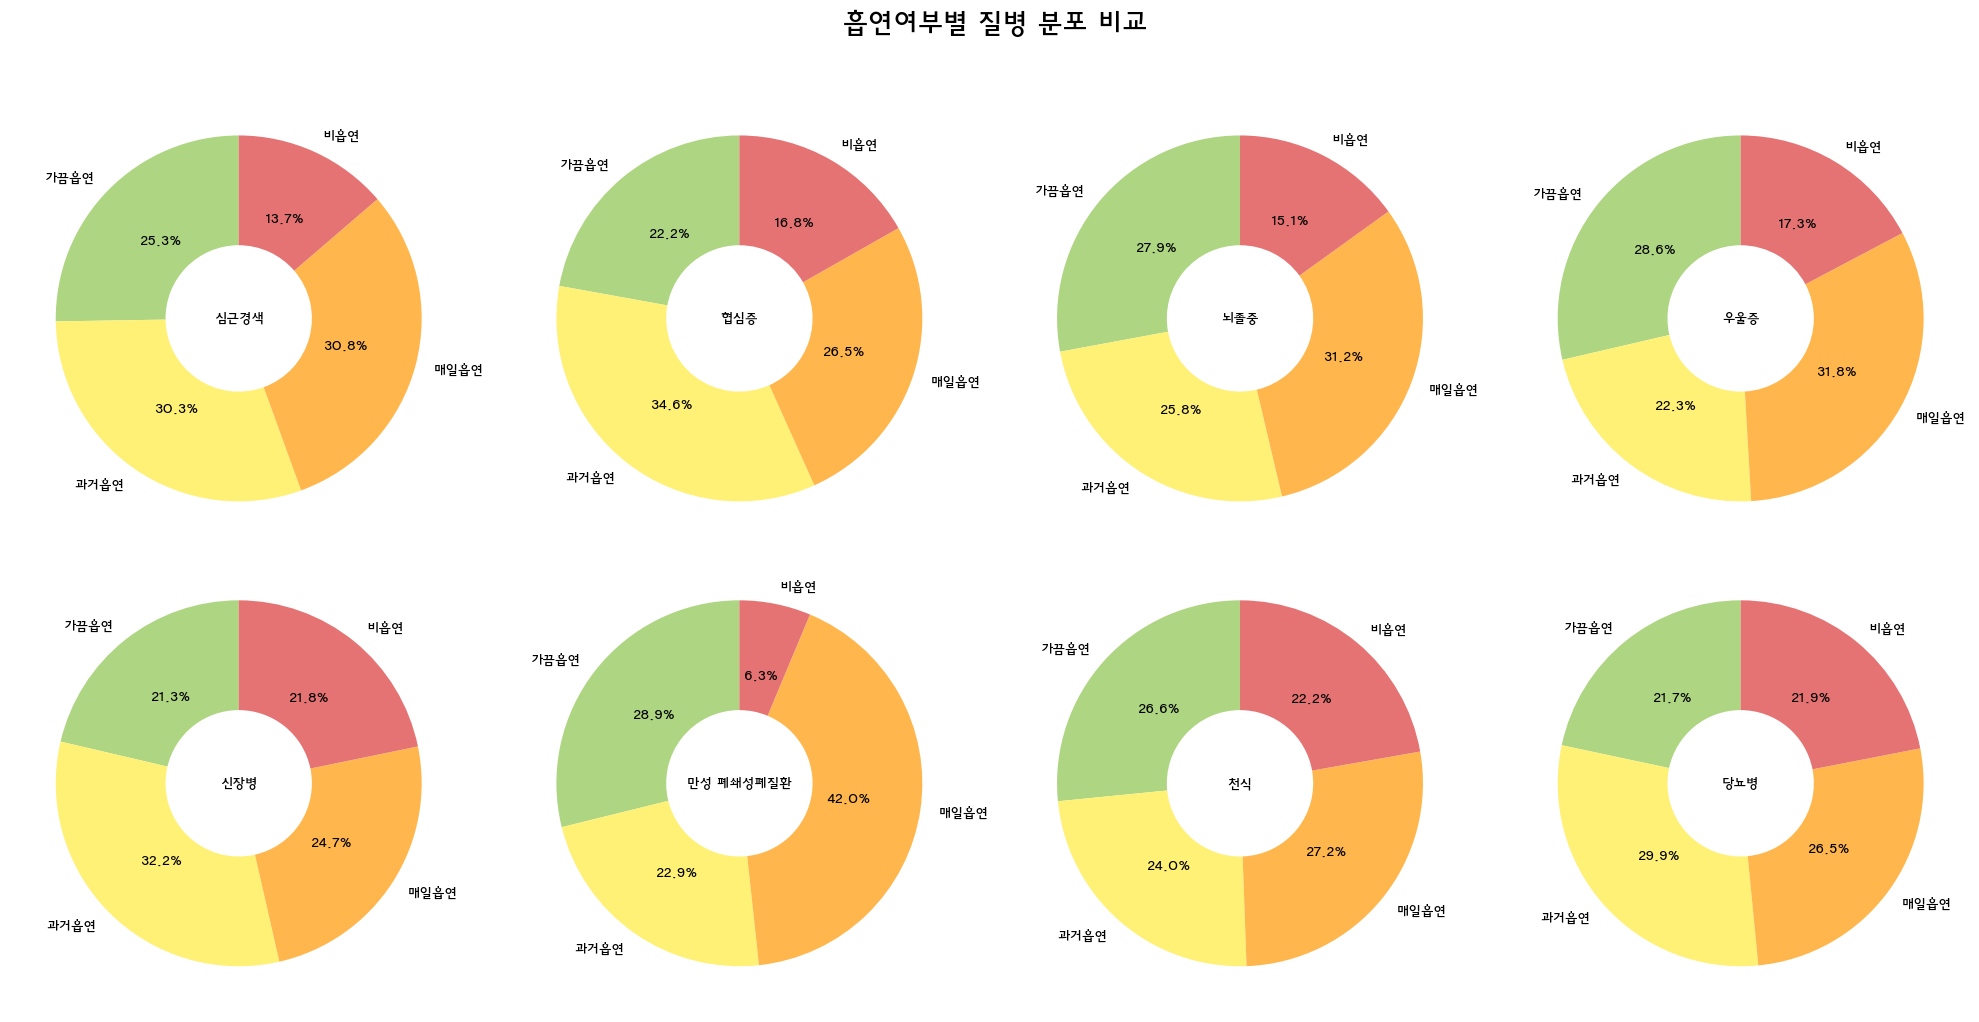

In [31]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))



angina_rate = df.groupby('SmokerStatus')['HadAngina'].apply(lambda x: (x == 'Yes').mean())
heart_attack_rate = df.groupby('SmokerStatus')['HadHeartAttack'].apply(lambda x: (x == 'Yes').mean())
stroke_rate = df.groupby('SmokerStatus')['HadStroke'].apply(lambda x: (x == 'Yes').mean())
depressive_disorder_rate = df.groupby('SmokerStatus')['HadDepressiveDisorder'].apply(lambda x: (x == 'Yes').mean())
kidney_rate = df.groupby('SmokerStatus')['HadKidneyDisease'].apply(lambda x: (x == 'Yes').mean())
copd_rate = df.groupby('SmokerStatus')['HadCOPD'].apply(lambda x: (x == 'Yes').mean())
asthma_rate = df.groupby('SmokerStatus')['HadAsthma'].apply(lambda x: (x == 'Yes').mean())
diabetes_rate = df.groupby('SmokerStatus')['HadDiabetes'].apply(
    lambda x: ((x == 'Yes') | (x == 'No, pre-diabetes or borderline diabetes')).mean()
)

# 심근경색
ax[0][0].pie(
    heart_attack_rate,
    labels=heart_attack_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)

ax[0][0].text(0, 0, '심근경색', ha='center', va='center')

# 협심증
ax[0][1].pie(
    angina_rate,
    labels=angina_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[0][1].text(0, 0, '협심증', ha='center', va='center')

# 뇌졸중
ax[0][2].pie(
    stroke_rate,
    labels=stroke_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[0][2].text(0, 0, '뇌졸중', ha='center', va='center')

# 우울증
ax[0][3].pie(
    depressive_disorder_rate,
    labels=depressive_disorder_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[0][3].text(0, 0, '우울증', ha='center', va='center')

# 신장병
ax[1][0].pie(
    kidney_rate,
    labels=kidney_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[1][0].text(0, 0, '신장병', ha='center', va='center')

# 만성 폐쇄폐질환
ax[1][1].pie(
    copd_rate,
    labels=copd_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[1][1].text(0, 0, '만성 폐쇄성폐질환', ha='center', va='center')

# 천식
ax[1][2].pie(
    asthma_rate,
    labels=asthma_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[1][2].text(0, 0, '천식', ha='center', va='center')

# 당뇨
ax[1][3].pie(
    diabetes_rate,
    labels=diabetes_rate.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#AED581', '#FFF176', '#FFB74D', '#E57373', '#C62828'],
    wedgeprops={'width' : 0.6}
)
ax[1][3].text(0, 0, '당뇨병', ha='center', va='center')


plt.suptitle('흡연여부별 질병 분포 비교', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 8.상관관계 및 교차분석

In [24]:
df_corr = df[['BMI', 'Sex', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'AlcoholDrinkers', 'PhysicalActivities', 'AgeCategory', 'SmokerStatus', 'HadHeartAttack', 'HadAngina', 'HadStroke']]

df_corr['AlcoholDrinkers'] = df_corr['AlcoholDrinkers'].map({'Yes' : 1, 'No' : 0})
df_corr['PhysicalActivities'] = df_corr['PhysicalActivities'].map({'Yes' : 1, 'No' : 0})
df_corr['SmokerStatus'] = df_corr['SmokerStatus'].map({'비흡연' : 0, '과거흡연' : 1, '가끔흡연' : 2, '매일흡연' : 3})
df_corr['Sex'] = df_corr['Sex'].map({'Male' : 1, 'Female' : 0} )

# 각 상품의 출현 순서에 따라 정수를 순차적으로 매칭한 코드 열 생성
# df['코드'] = df['상품'].astype('category').cat.codes
# df['코드'] = df['상품'].factorize()[0]

disease_cols = ['HadStroke'
                , 'HadHeartAttack', 'HadAngina']

for col in disease_cols:
    df_corr[col] = df_corr[col].map({'Yes':1, 'No':0})





df_corr['AgeCategory'] = df['AgeCategory'].map({
    'Age 18 to 24' : 0,
    'Age 25 to 29' : 1,
    'Age 30 to 34' : 2,
    'Age 35 to 39' : 3,
    'Age 40 to 44' : 4,
    'Age 45 to 49' : 5,
    'Age 50 to 54' : 6,
    'Age 55 to 59' : 7,
    'Age 60 to 64' : 8,
    'Age 65 to 69' : 9,
    'Age 70 to 74' : 10,
    'Age 75 to 79' : 11,
    'Age 80 or older' : 12
})

corr_mat = df_corr.corr(numeric_only = True)

corr_mat

C:\Users\TJ\AppData\Local\Temp\ipykernel_6248\1552106288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['AlcoholDrinkers'] = df_corr['AlcoholDrinkers'].map({'Yes' : 1, 'No' : 0})
C:\Users\TJ\AppData\Local\Temp\ipykernel_6248\1552106288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['PhysicalActivities'] = df_corr['PhysicalActivities'].map({'Yes' : 1, 'No' : 0})
C:\Users\TJ\AppData\Local\Temp\ipykernel_6248\1552106288.py:5: SettingWithCopyWarning: 
A value is trying to be set on a c

,BMI,Sex,PhysicalHealthDays,MentalHealthDays,SleepHours,AlcoholDrinkers,PhysicalActivities,AgeCategory,SmokerStatus,HadHeartAttack,HadAngina,HadStroke
BMI,1.000000,0.007782,0.116905,0.082182,-0.062391,-0.070867,-0.158922,-0.025557,-0.003266,0.030413,0.040676,0.019942
Sex,0.007782,1.000000,-0.044081,-0.091705,-0.015324,0.093824,0.059334,-0.053536,0.043266,0.073316,0.065590,0.001815
PhysicalHealthDays,0.116905,-0.044081,1.000000,0.306800,-0.072165,-0.129370,-0.240842,0.089879,0.120174,0.133420,0.149130,0.128731
MentalHealthDays,0.082182,-0.091705,0.306800,1.000000,-0.149744,-0.025991,-0.110531,-0.189794,0.125453,0.025892,0.024086,0.042087
SleepHours,-0.062391,-0.015324,-0.072165,-0.149744,1.000000,0.002840,0.014707,0.132325,-0.059373,-0.000659,0.009011,0.004020
AlcoholDrinkers,-0.070867,0.093824,-0.129370,-0.025991,0.002840,1.000000,0.157835,-0.124038,-0.003063,-0.074181,-0.067258,-0.071131
PhysicalActivities,-0.158922,0.059334,-0.240842,-0.110531,0.014707,0.157835,1.000000,-0.107459,-0.121323,-0.083187,-0.078761,-0.079299
AgeCategory,-0.025557,-0.053536,0.089879,-0.189794,0.132325,-0.124038,-0.107459,1.000000,0.039539,0.172172,0.198897,0.132361
SmokerStatus,-0.003266,0.043266,0.120174,0.125453,-0.059373,-0.003063,-0.121323,0.039539,1.000000,0.077336,0.051808,0.058888
HadHeartAttack,0.030413,0.073316,0.133420,0.025892,-0.000659,-0.074181,-0.083187,0.172172,0.077336,1.000000,0.445903,0.177137


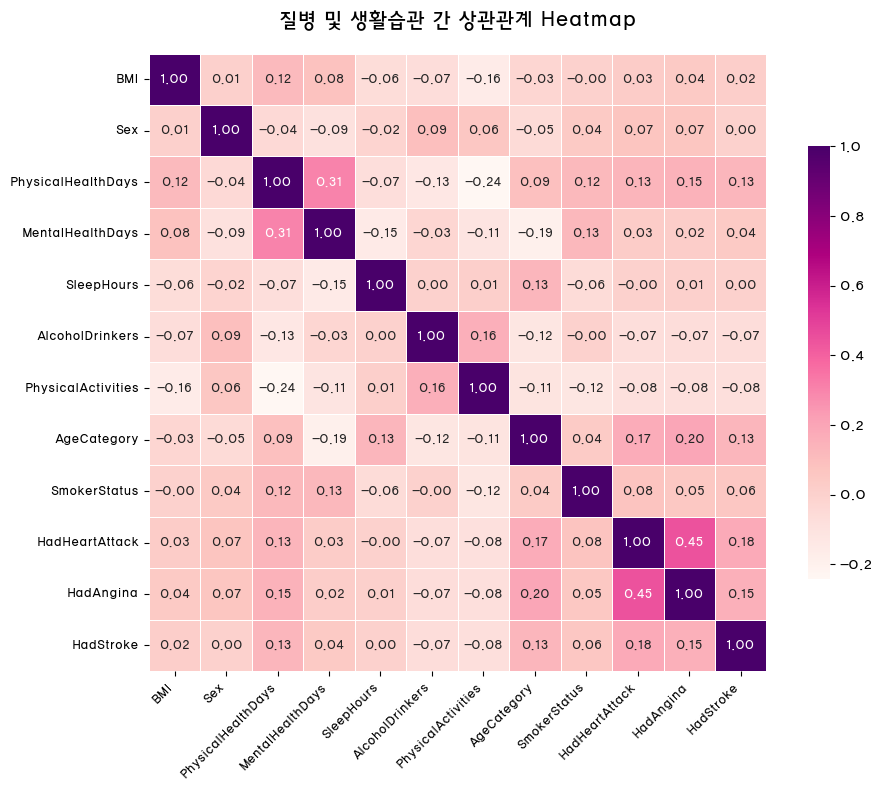

In [25]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_mat,
    annot=True,
    fmt='.2f',
    cmap='RdPu',              
    linewidths=0.6,            
    annot_kws={'size':9},      
    cbar_kws={'shrink':0.7},   
    square=True
)

plt.title('질병 및 생활습관 간 상관관계 Heatmap', fontsize=15, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

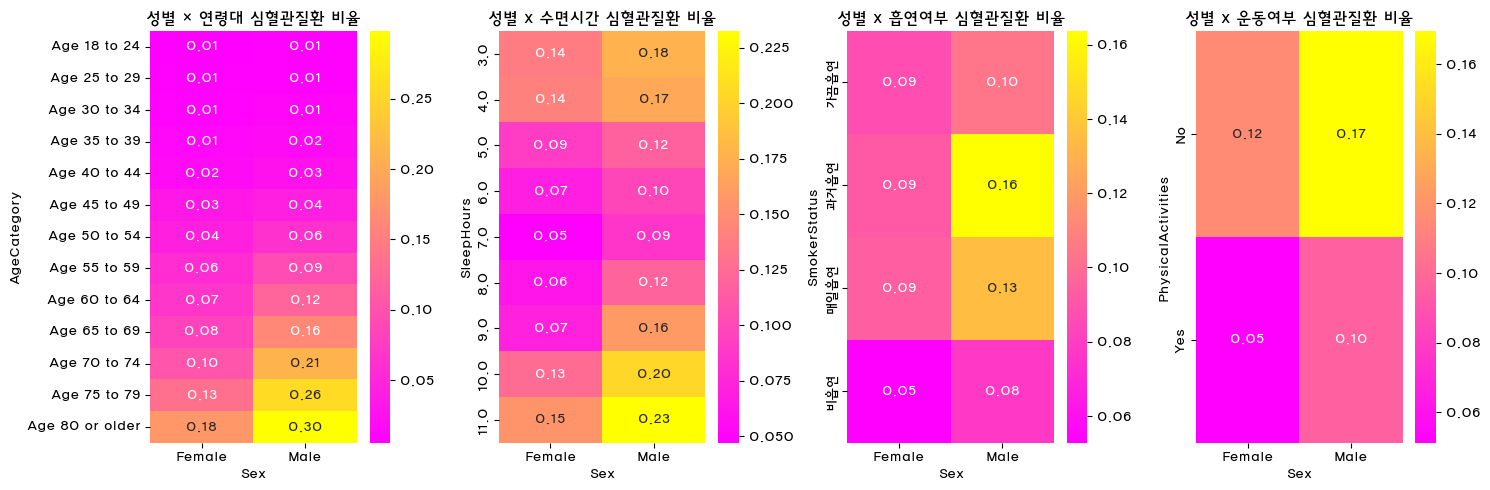

In [26]:
fig, ax = plt.subplots(1,4, figsize=(15,5))
pivot_sex_age = df.pivot_table(index='AgeCategory', columns='Sex', values='HeartDisease_num')
pivot_sex_sleep = df.pivot_table(index='SleepHours', columns='Sex', values='HeartDisease_num')
pivot_sex_smoke = df.pivot_table(index='SmokerStatus', columns='Sex', values='HeartDisease_num')
pivot_sex_exercise = df.pivot_table(index='PhysicalActivities', columns='Sex', values='HeartDisease_num')

sns.heatmap(pivot_sex_age, annot=True, fmt='.2f', ax= ax[0], cmap='spring')
ax[0].set_title("성별 × 연령대 심혈관질환 비율")

sns.heatmap(pivot_sex_sleep, annot=True, fmt='.2f', ax= ax[1], cmap='spring')
ax[1].set_title("성별 x 수면시간 심혈관질환 비율")

sns.heatmap(pivot_sex_smoke, annot=True, fmt='.2f', ax= ax[2], cmap='spring')
ax[2].set_title("성별 x 흡연여부 심혈관질환 비율")
sns.heatmap(pivot_sex_exercise, annot=True, fmt='.2f', ax= ax[3], cmap='spring')
ax[3].set_title("성별 x 운동여부 심혈관질환 비율")

plt.tight_layout()
plt.show()

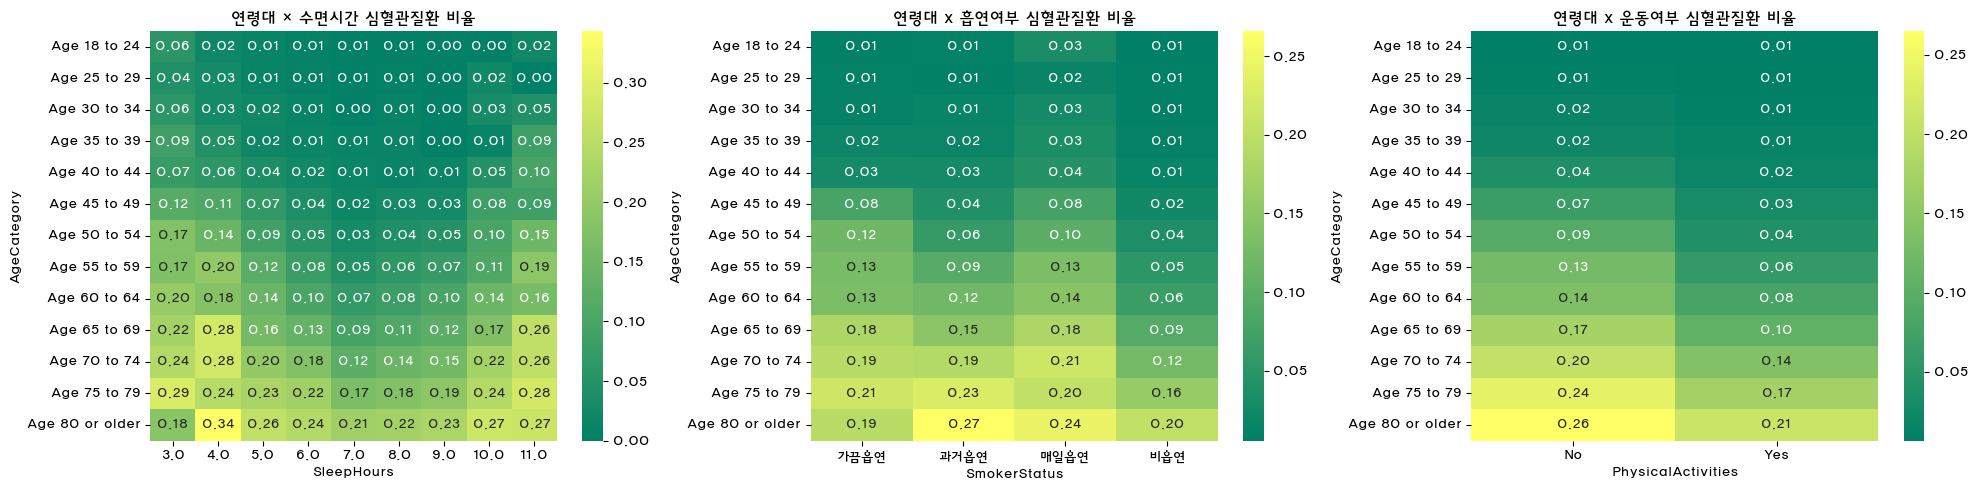

In [27]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
pivot_age_sleep = df.pivot_table(index='AgeCategory', columns='SleepHours', values='HeartDisease_num')
pivot_age_smoke = df.pivot_table(index='AgeCategory', columns='SmokerStatus', values='HeartDisease_num')
pivot_age_exercise = df.pivot_table(index='AgeCategory', columns='PhysicalActivities', values='HeartDisease_num')


sns.heatmap(pivot_age_sleep, annot=True, fmt='.2f', ax= ax[0], cmap='summer')
ax[0].set_title("연령대 × 수면시간 심혈관질환 비율")

sns.heatmap(pivot_age_smoke, annot=True, fmt='.2f', ax= ax[1], cmap='summer')
ax[1].set_title("연령대 x 흡연여부 심혈관질환 비율")

sns.heatmap(pivot_age_exercise, annot=True, fmt='.2f', ax= ax[2], cmap='summer')
ax[2].set_title("연령대 x 운동여부 심혈관질환 비율")

plt.tight_layout()
plt.show()

C:\Users\TJ\AppData\Local\Temp\ipykernel_6248\3082038649.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_bmi_sleep = df.pivot_table(index='bmi_group', columns='SleepHours', values='HeartDisease_num')
C:\Users\TJ\AppData\Local\Temp\ipykernel_6248\3082038649.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_bmi_smoke = df.pivot_table(index='bmi_group', columns='SmokerStatus', values='HeartDisease_num')
C:\Users\TJ\AppData\Local\Temp\ipykernel_6248\3082038649.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain 

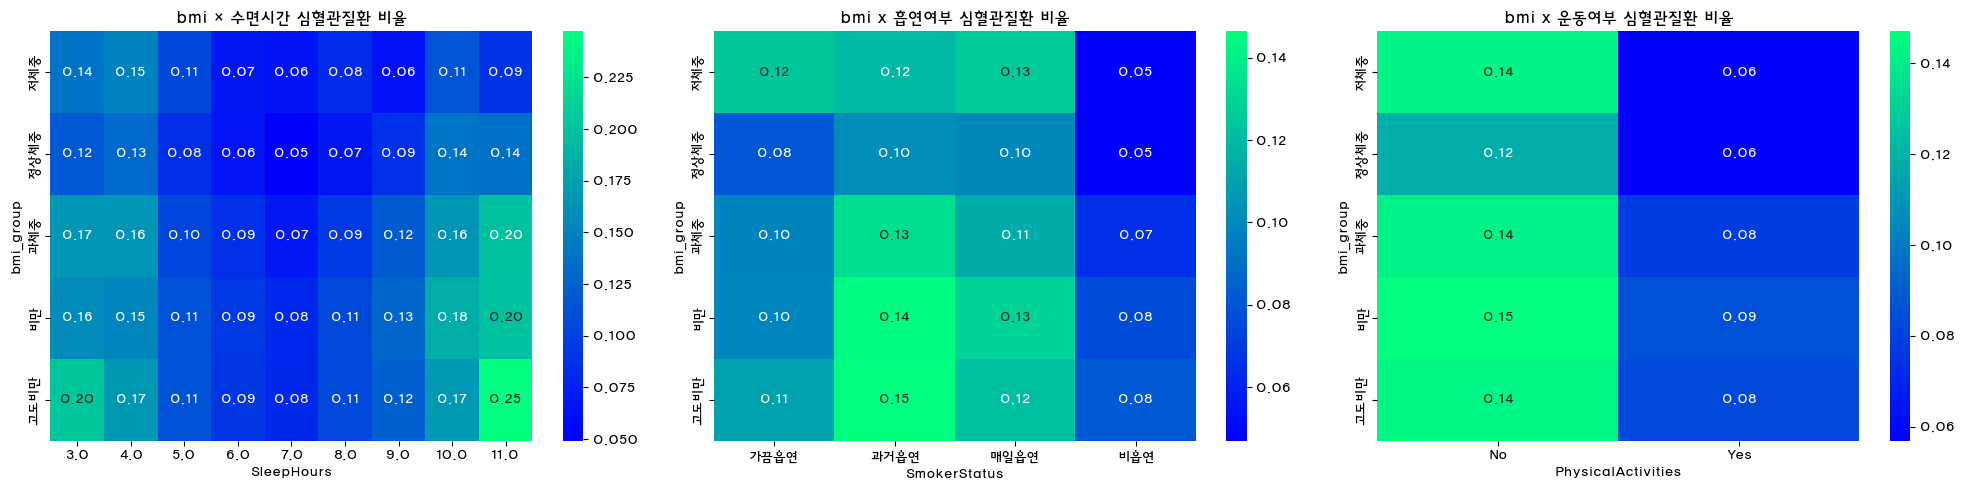

In [28]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
pivot_bmi_sleep = df.pivot_table(index='bmi_group', columns='SleepHours', values='HeartDisease_num')
pivot_bmi_smoke = df.pivot_table(index='bmi_group', columns='SmokerStatus', values='HeartDisease_num')
pivot_bmi_exercise = df.pivot_table(index='bmi_group', columns='PhysicalActivities', values='HeartDisease_num')


sns.heatmap(pivot_bmi_sleep, annot=True, fmt='.2f', ax= ax[0], cmap='winter')
ax[0].set_title("bmi × 수면시간 심혈관질환 비율")

sns.heatmap(pivot_bmi_smoke, annot=True, fmt='.2f', ax= ax[1], cmap='winter')
ax[1].set_title("bmi x 흡연여부 심혈관질환 비율")

sns.heatmap(pivot_bmi_exercise, annot=True, fmt='.2f', ax= ax[2], cmap='winter')
ax[2].set_title("bmi x 운동여부 심혈관질환 비율")

plt.tight_layout()
plt.show()

## 9 .최종 요약 인사이트

### 1️⃣. 심혈관질환은 나이, bmi, 수면시간, 운동여부에 영향을 받음
- 65세 이후, 비만·고도비만 구간, 수면 6~7시간을 벗어난 경우, 운동을 하지 않는 경우에서 발병률이 뚜렷
- 남성의 표본수가 더 적은데도 심혈관질환

### 2️⃣. 남성의 발병률이 여성보다 더 높은 이유는 생활습관 차이
- 남성이 여성보다 과체중 비만 고도비만 비율이 높고
- 흡연자 비율도 여성보다 높다

### 3️⃣. 비만은 대부분의 질환 위험을 끌어올리는 핵심 요인

- 고도비만·비만 구간에서 심근경색, 협심증, 뇌졸중, 당뇨, COPD 등 주요 질환 비율이 가장 높게 나타남

### 4️⃣. 흡연은 비만 다음으로 일관된 위험 증가 요인

- 매일흡연 그룹은 거의 모든 질환에서 가장 높은 비율을 기록

### 5️⃣. 나이는 가장 강력한 단일 위험 요인

45세 이후부터 심혈관질환 발생 비율이 눈에 띄게 증가함

### 6️⃣. 수면시간은 짧아도, 너무 길어도 위험

6~7시간 구간에서 발병률이 가장 낮게 나타나는 U자형 패턴

3~5시간의 짧은 수면, 9시간 이상의 장시간 수면 모두 위험 증가와 연결됨

### 7️⃣. 운동 여부는 심혈관질환 예방에 도움이 됨

운동을 하는 그룹은 대부분의 질환 발생 비율이 크게 낮았다.

BMI, 연령, 성별과 관계없이 운동 여부는 일관된 보호 효과를 보였다.